<a href="https://colab.research.google.com/github/GustavoFPS/Machine-Learning/blob/main/Atividade2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudo Exploratório

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ler arquivo e verificar tabela
df_ini = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dados_filtrados.csv', header = 0, decimal = '.', sep = ",")
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18306 entries, 0 to 18305
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         18306 non-null  int64  
 1   TP_ESCOLA          18306 non-null  int64  
 2   TP_PRESENCA_CH     18306 non-null  int64  
 3   TP_PRESENCA_CN     18306 non-null  int64  
 4   TP_PRESENCA_LC     18306 non-null  int64  
 5   NU_IDADE           18306 non-null  int64  
 6   TP_ST_CONCLUSAO    18306 non-null  int64  
 7   TP_ANO_CONCLUIU    18306 non-null  int64  
 8   TP_ENSINO          5762 non-null   float64
 9   IN_TREINEIRO       18306 non-null  int64  
 10  NU_NOTA_CN         13783 non-null  float64
 11  NU_NOTA_CH         13783 non-null  float64
 12  NU_NOTA_LC         13510 non-null  float64
 13  NU_NOTA_MT         10133 non-null  float64
 14  TP_STATUS_REDACAO  13510 non-null  float64
 15  NU_NOTA_REDACAO    13510 non-null  float64
dtypes: float64(7), int64(9

In [ ]:
# Dado que o que queremos prever são as notas de matemática, não faz sentido treinar o modelo
# com dados de nota de matemática faltantes
print(df_ini.isna().sum())
df = df_ini.dropna(subset=['NU_NOTA_MT'], how = 'any', inplace = False)
df = df[df['NU_NOTA_MT'] != 0]


Unnamed: 0               0
TP_ESCOLA                0
TP_PRESENCA_CH           0
TP_PRESENCA_CN           0
TP_PRESENCA_LC           0
NU_IDADE                 0
TP_ST_CONCLUSAO          0
TP_ANO_CONCLUIU          0
TP_ENSINO            12544
IN_TREINEIRO             0
NU_NOTA_CN            4523
NU_NOTA_CH            4523
NU_NOTA_LC            4796
NU_NOTA_MT            8173
TP_STATUS_REDACAO     4796
NU_NOTA_REDACAO       4796
dtype: int64


In [ ]:
# Checa o resultado
print(df.isna().sum())

Unnamed: 0              0
TP_ESCOLA               0
TP_PRESENCA_CH          0
TP_PRESENCA_CN          0
TP_PRESENCA_LC          0
NU_IDADE                0
TP_ST_CONCLUSAO         0
TP_ANO_CONCLUIU         0
TP_ENSINO            6488
IN_TREINEIRO            0
NU_NOTA_CN             35
NU_NOTA_CH             35
NU_NOTA_LC              0
NU_NOTA_MT              0
TP_STATUS_REDACAO       0
NU_NOTA_REDACAO         0
dtype: int64


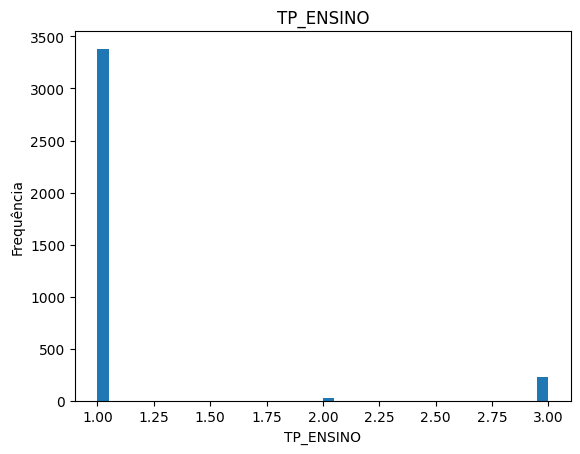

In [ ]:
# Há muitos dados faltantes da coluna TP_Ensino, que pode ser interessante na análise
def histograma(dado, title, bin = 50, F = False):
    plt.hist(dado, bins = bin, density = F)
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel('Frequência')
    mean = np.mean(dado)
    q3 = np.percentile(dado, 75)
    q1 = np.percentile(dado, 25)
    IIQ =  q3 - q1
    #plt.axvline(x=mean, color="red", linestyle="--", label = "Média")
    #plt.axvline(x=q3 + 1.5*IIQ, color="g", linestyle="--", label = "Máximo")
    #plt.axvline(x=q1 - 1.5*IIQ, color="g", linestyle="--", label = "Mínimo")
    #plt.axvline(x= np.percentile(dado, 50), color="black", linestyle="--", label = "Mediana")
    #plt.legend(fontsize = 14)
    plt.show()

histograma(df["TP_ENSINO"],"TP_ENSINO", bin = 40, F = False)


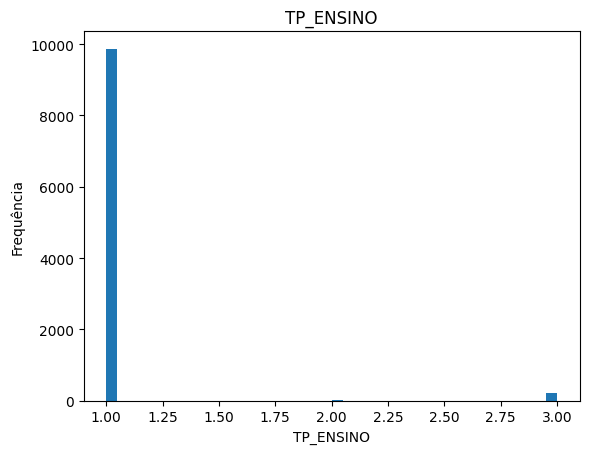

In [ ]:
# Substituindo os valores faltantes pelo valor predominante

df['TP_ENSINO'].fillna(1, inplace=True)
histograma(df["TP_ENSINO"],"TP_ENSINO", bin = 40, F = False)


In [ ]:
print(df.isna().sum())

Unnamed: 0            0
TP_ESCOLA             0
TP_PRESENCA_CH        0
TP_PRESENCA_CN        0
TP_PRESENCA_LC        0
NU_IDADE              0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
TP_ENSINO             0
IN_TREINEIRO          0
NU_NOTA_CN           35
NU_NOTA_CH           35
NU_NOTA_LC            0
NU_NOTA_MT            0
TP_STATUS_REDACAO     0
NU_NOTA_REDACAO       0
dtype: int64


<Axes: >

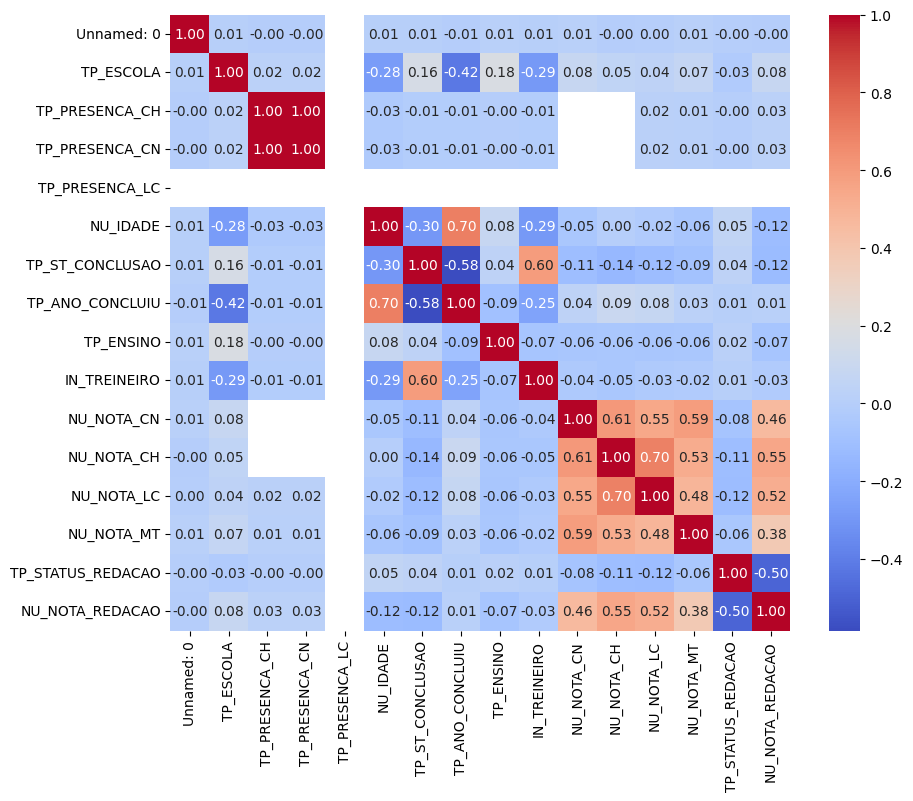

In [ ]:
# Para treinar o modelo, precisamos checar as correlações
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

In [ ]:
# Usando a matriz de correlação, defino um limiar de correlação para ser usado no modelo
corr = df.corr()['NU_NOTA_MT']
limiar = corr[abs(corr) > 0.3]
print(limiar)

colunas_corr = limiar.index.tolist()
data_mt = df[colunas_corr]

NU_NOTA_CN         0.585789
NU_NOTA_CH         0.528940
NU_NOTA_LC         0.483159
NU_NOTA_MT         1.000000
NU_NOTA_REDACAO    0.379523
Name: NU_NOTA_MT, dtype: float64


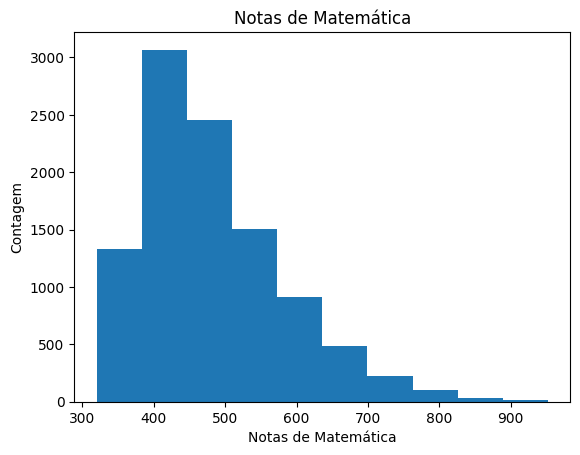

In [ ]:
plt.hist(data_mt['NU_NOTA_MT'], bins = 10 )
plt.title('Notas de Matemática')
plt.xlabel('Notas de Matemática')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Verifica zero nas colunas
zeros = data_mt.apply(lambda x: (x == 0).sum())
# Imprimir o resultado
print(zeros)

NU_NOTA_CN           4
NU_NOTA_CH           1
NU_NOTA_LC           0
NU_NOTA_MT           0
NU_NOTA_REDACAO    239
dtype: int64


In [ ]:

mn = ['on', 'off', 'red', 'nt']

mn = mn[0]
if mn == 'on':
  #substitui pela media
  mean = [data_mt[data_mt['NU_NOTA_CH']!= 0]['NU_NOTA_CH'].mean(),
          data_mt[data_mt['NU_NOTA_CN']!= 0]['NU_NOTA_CN'].mean(),
          data_mt[data_mt['NU_NOTA_LC']!= 0]['NU_NOTA_LC'].mean()]

  data_mt.loc[:, 'NU_NOTA_CH'] = data_mt['NU_NOTA_CH'].replace(0, mean[0])
  data_mt.loc[:, 'NU_NOTA_CN'] = data_mt['NU_NOTA_CN'].replace(0, mean[1])
  data_mt.loc[:, 'NU_NOTA_LC'] = data_mt['NU_NOTA_LC'].replace(0, mean[2])
  data_mt['NU_NOTA_CN'].fillna(mean[1], inplace=True)
  data_mt['NU_NOTA_CH'].fillna(mean[0], inplace=True)
  data_mt = data_mt.dropna()
  # Verifica zero nas colunas
  zeros = data_mt.apply(lambda x: (x == 0).sum())
  # Imprimir o resultado
  print(zeros)

elif mn == 'off':
  # Substituo os zero pelas notas mínimas em cada área do conhecimento, exceto
  # redação do ano de 2016

  data_mt.loc[:, 'NU_NOTA_CH'] = data_mt['NU_NOTA_CH'].replace(0, 317.4)
  data_mt.loc[:, 'NU_NOTA_CN'] = data_mt['NU_NOTA_CN'].replace(0, 316.5)
  data_mt.loc[:, 'NU_NOTA_LC'] = data_mt['NU_NOTA_LC'].replace(0, 287.5)

  data_mt['NU_NOTA_CN'].fillna(316.5, inplace=True)
  data_mt['NU_NOTA_CH'].fillna(317.4, inplace=True)
  data_mt = data_mt.dropna()
  # Verifica zero nas colunas
  zeros = data_mt.apply(lambda x: (x == 0).sum())
  # Imprimir o resultado
  print(zeros)

elif mn =='red':
  #retira todos os NaN mas mantem os zeros da redaçao
  data_mt = data_mt.dropna()
  data_mt = data_mt[(data_mt.iloc[:, :-1] != 0).any(axis=1)]

else:
  #retira todos os NaN e todos os zeros
  data_mt = data_mt.dropna()
  data_mt = data_mt[(data_mt != 0).all(axis=1)]

NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
NU_NOTA_MT           0
NU_NOTA_REDACAO    239
dtype: int64


<ipython-input-131-894d5f1f6362>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mt['NU_NOTA_CN'].fillna(mean[1], inplace=True)
<ipython-input-131-894d5f1f6362>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mt['NU_NOTA_CH'].fillna(mean[0], inplace=True)


In [ ]:
print(data_mt.isna().sum())

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Separar atributos e alvo
X = data_mt.drop('NU_NOTA_MT', axis=1)
y = data_mt['NU_NOTA_MT']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

stat = []

In [ ]:
print(X_train)

       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO
1527        610.0       577.3       511.4            480.0
8959        548.5       636.2       598.7            520.0
1360        542.2       517.1       573.2            680.0
13494       556.9       579.0       548.7            500.0
2133        458.5       377.6       528.8            560.0
...           ...         ...         ...              ...
7772        541.0       595.5       556.7            720.0
7039        500.9       560.6       546.1            560.0
7301        399.9       508.6       557.2            580.0
1177        460.6       592.2       576.0            580.0
9881        417.5       397.8       518.0            440.0

[9110 rows x 4 columns]


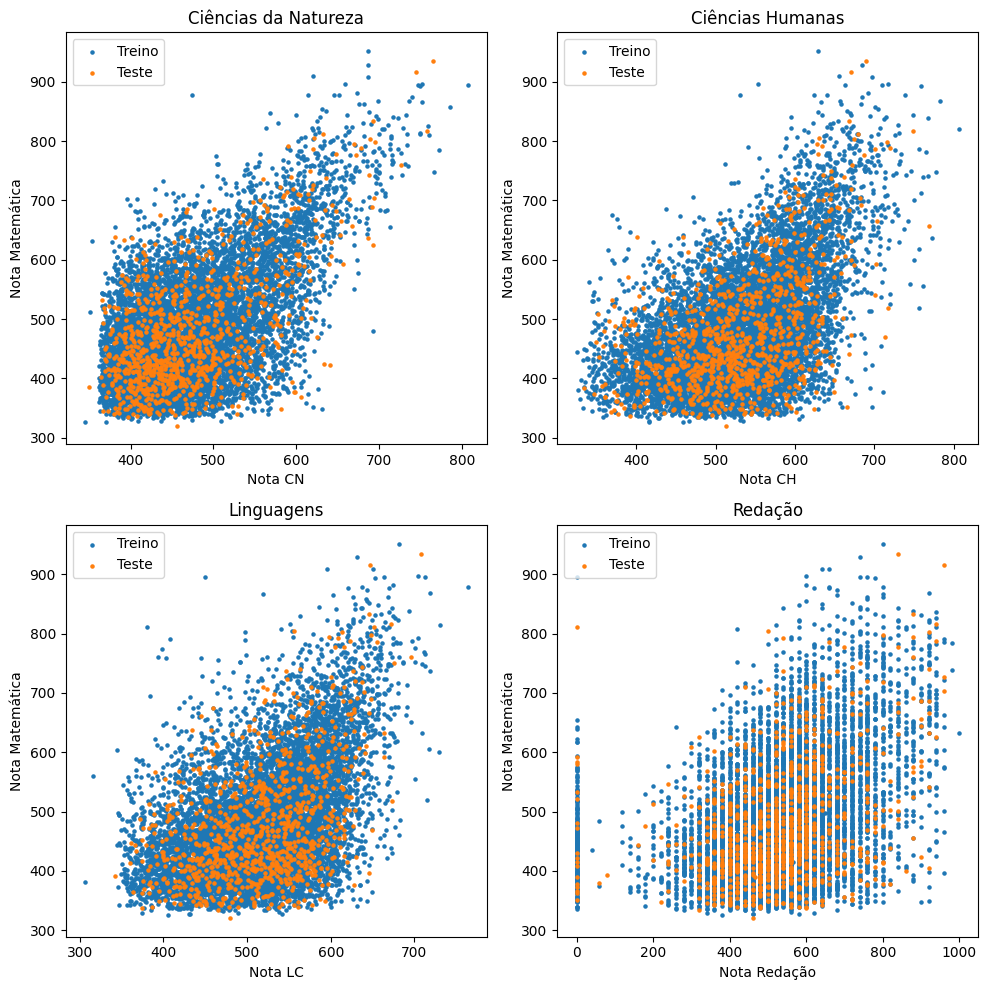

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
size = 5
nota = ['Nota CN', 'Nota CH', 'Nota LC', 'Nota Redação']
nome = ["Ciências da Natureza", "Ciências Humanas", "Linguagens", "Redação"]
# Itera sobre cada coluna do conjunto de treinamento
for i, element in enumerate(X_train.columns):  # Excluindo a última coluna
    row = i // 2
    col = i % 2

    axs[row, col].scatter(X_train.iloc[:, i], y_train, label='Treino', s = size)
    axs[row, col].scatter(X_test.iloc[:, i], y_test, label='Teste', s = size)
    axs[row, col].legend(loc="upper left")
    axs[row, col].set_xlabel(nota[i])
    axs[row, col].set_ylabel('Nota Matemática')
    axs[row, col].set_title(nome[i])

plt.tight_layout()
plt.show()


In [ ]:

def teste(X_test, y_test, y_pred, metodo = None, show = 'on'):
  # Métricas de desempenho no conjunto de teste
  mse = mean_squared_error(y_test,y_pred) # mean squared error
  r2 = r2_score(y_test,y_pred) # R^2
  mae = mean_absolute_error(y_test,y_pred)
  fig = plt.subplot()
  plt.scatter(y_test, y_pred)
  plt.plot(y_test, y_test, color = 'black', label = 'Verdadeira = Predita')
  plt.xlabel('Nota MT verdadeira')
  plt.ylabel('Nota MT predita')
  plt.title(metodo)

  if show == 'on':
    plt.show()

  print('R^2 = ', r2)
  print('MSE = ', mse)
  print('MAE = ', mae)
  return r2, mse, mae, metodo


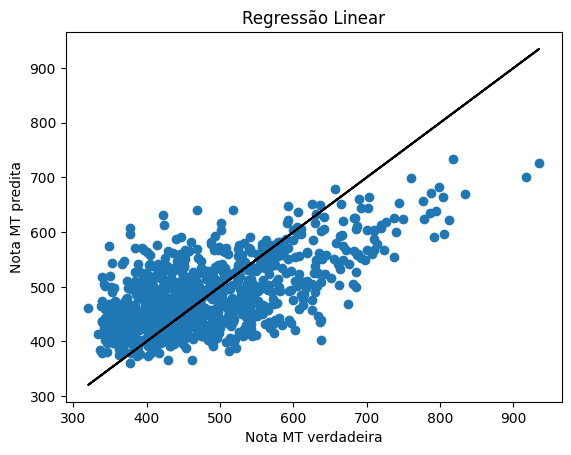

R^2 =  0.37821437497600074
MSE =  5789.779511557565
MAE =  60.573858100002894


In [ ]:
from sklearn.linear_model import LinearRegression

# Supondo que X_train seja seu conjunto de treinamento com várias features
# e y_train seja seu conjunto de treinamento com a variável dependente
# Ambos são arrays do numpy ou DataFrames do pandas

# 1. Instancie o objeto LinearRegression
regressor = LinearRegression()

# 2. Ajuste o modelo aos seus dados
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



lin = teste(X_test, y_test, y_pred, 'Regressão Linear')
stat.append(lin)

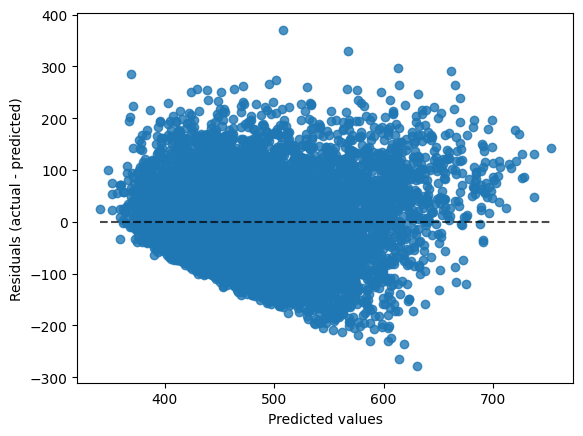

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
y_pred = regressor.predict(X_train)
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
display.plot()
plt.show()

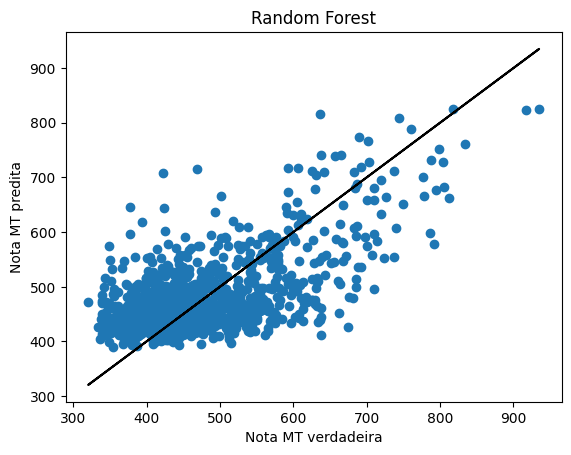

R^2 =  0.35869884673850494
MSE =  5971.499064083911
MAE =  62.1417403751234


In [ ]:
# Random Forest
rf_model = RandomForestRegressor( random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

random = teste(X_test, y_test, y_pred, 'Random Forest')
stat.append(random)

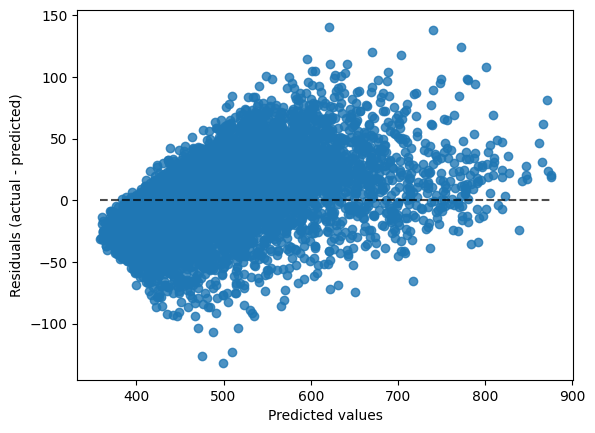

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
y_pred = rf_model.predict(X_train)
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
display.plot()
plt.show()

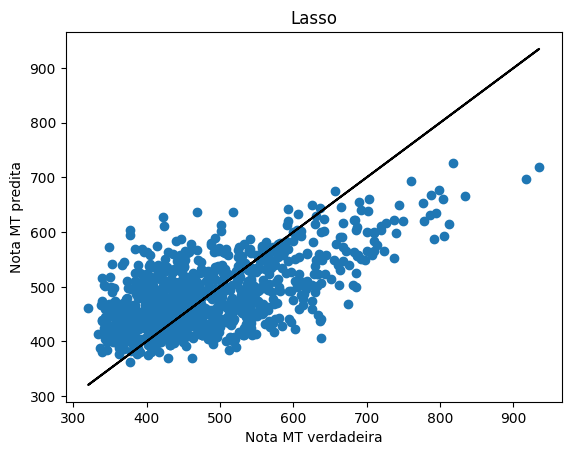

R^2 =  0.3791762697330012
MSE =  5780.822793466597
MAE =  60.56753971754832


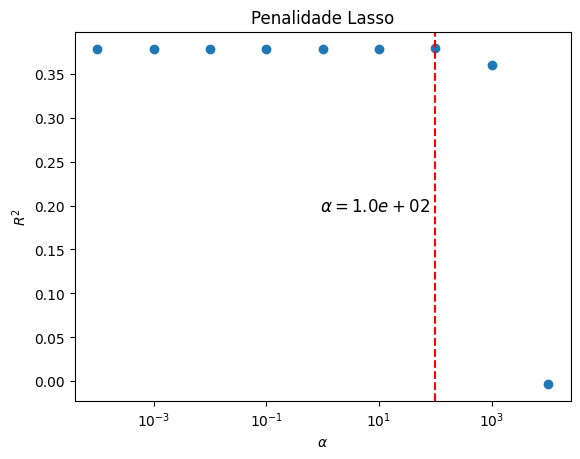

In [ ]:
from sklearn.linear_model import Lasso

a = 0.0001
r = 0
a_ext = 'None'
ar_xdados = []
ar_ydados = []
while a <= 10**5:
  lassoReg = Lasso(alpha=a)
  lassoReg.fit(X_train,y_train)
  y_pred = lassoReg.predict(X_test) # predição para o conjunto de teste
  r2 = r2_score(y_test,y_pred)
  ar_xdados.append(a)
  ar_ydados.append(r2)
  if r2 > r:
    r = r2
    a_ext = a
  a += a*10 - a

lassoReg = Lasso(alpha=a_ext)
lassoReg.fit(X_train,y_train)
y_pred = lassoReg.predict(X_test)

lasso = teste(X_test, y_test, y_pred, 'Lasso')
stat.append(lasso)

fig, ax = plt.subplots()
ax.scatter(ar_xdados, ar_ydados)
#plt.plot(y_test, y_test, color = 'black', label = 'Verdadeira = Predita')
ax.set_xlabel(r'$\alpha$')
ax.set_xscale('log')
ax.set_ylabel(r'$R^2$')
ax.axvline(x=a_ext, color='r', linestyle='--', label=f'Melhor alpha: {a_ext}')
ax.text(a_ext*0.8 , r/2, f'$\\alpha = {a_ext:.1e}$', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
ax.set_title("Penalidade Lasso")
plt.show()

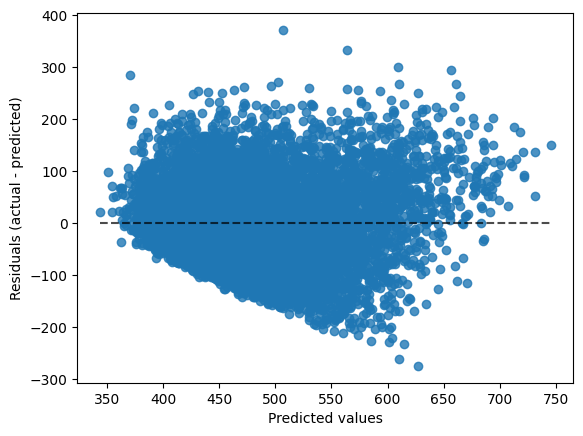

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
y_pred = lassoReg.predict(X_train)
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
display.plot()
plt.show()

0.0001


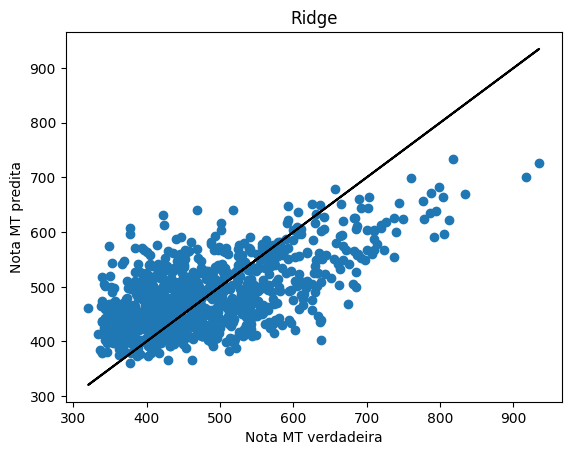

R^2 =  0.378214374975988
MSE =  5789.779511557684
MAE =  60.57385810000594


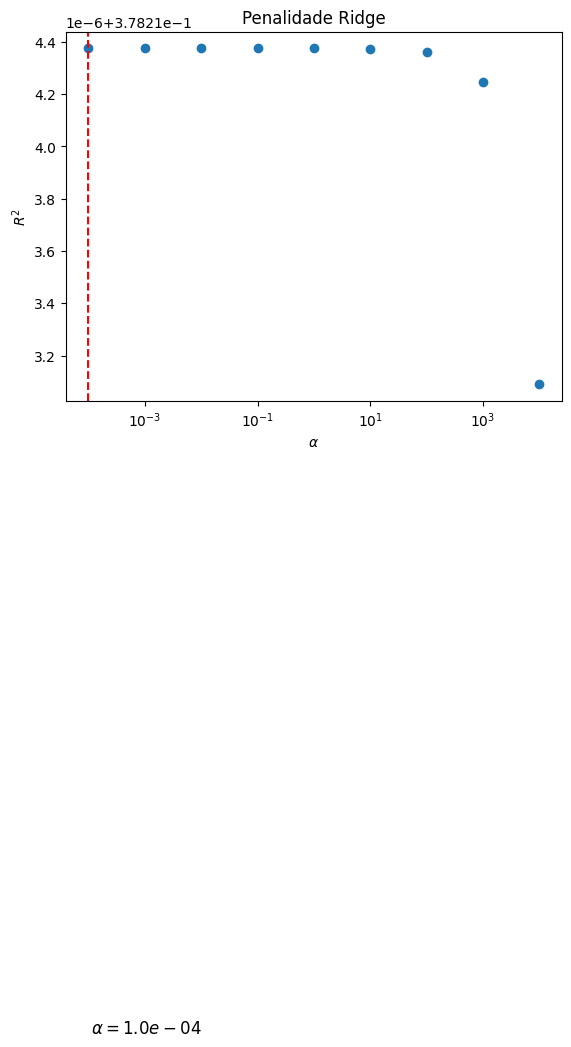

In [ ]:
from sklearn.linear_model import Ridge

a = 0.0001
r = 0
a_ext = 'None'
ar_xdados = []
ar_ydados = []
while a <= 10**5:
  ridgeReg = Ridge(alpha=a)
  ridgeReg.fit(X_train,y_train)
  y_pred = ridgeReg.predict(X_test) # predição para o conjunto de teste
  r2 = r2_score(y_test,y_pred)
  ar_xdados.append(a)
  ar_ydados.append(r2)
  if r2 > r:
    r = r2
    a_ext = a

  a += a*10 - a

print(a_ext)
ridgeReg = Ridge(alpha=a_ext)
ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test) # predição para o conjunto de teste
ridge = teste(X_test, y_test, y_pred, 'Ridge')
stat.append(ridge)

fig, axx = plt.subplots()
axx.scatter(ar_xdados, ar_ydados)
#plt.plot(y_test, y_test, color = 'black', label = 'Verdadeira = Predita')
axx.set_xlabel(r'$\alpha$')
axx.axvline(x=a_ext, color='r', linestyle='--', label=f'Melhor alpha: {a_ext}')
axx.text(a_ext*100 , r*0.99999, f'$\\alpha = {a_ext:.1e}$', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
axx.set_xscale('log')
axx.set_ylabel(r'$R^2$')
axx.set_title("Penalidade Ridge")
plt.show()


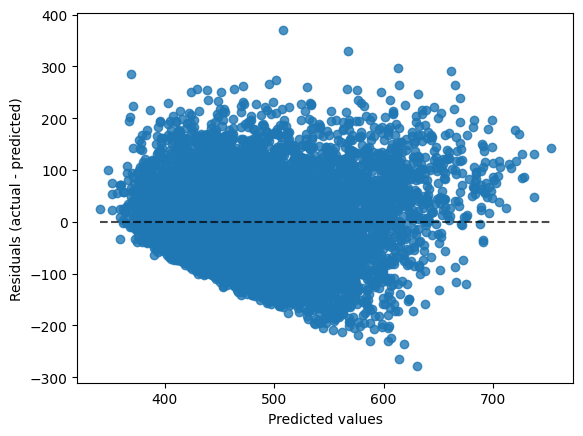

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
y_pred = ridgeReg.predict(X_train)
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
display.plot()
plt.show()

In [ ]:
stat_nome = [row[-1] for row in stat]
stat = [row[:-1] for row in stat]

                       R^2          MSE        MAE
Regressão Linear  0.378214  5789.779512  60.573858
Random Forest     0.358699  5971.499064  62.141740
Lasso             0.379176  5780.822793  60.567540
Ridge             0.378214  5789.779512  60.573858


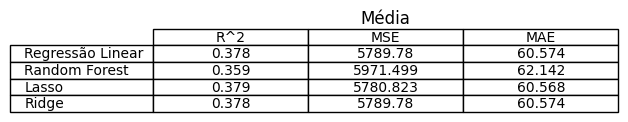

In [ ]:
# Criar o DataFrame diretamente a partir da lista de listas
df = pd.DataFrame(stat, columns=['R^2', 'MSE', 'MAE'], index = stat_nome)
print(df)

fig, ax = plt.subplots(figsize=(6, 1))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=np.round(df.values, 3), colLabels=df.columns,rowLabels=df.index, cellLoc='center', loc='center')

# Adicionar um título
if mn == 'on':
  title = 'Média'
elif mn == 'off':
  title =  'Menor nota'
elif mn == 'red':
  title =  'Sem nulos/ exceto redação'
else:
  title = 'Sem nulos'
plt.title(title)

# Exibir o gráfico
plt.show()

In [ ]:
num_casas_decimais = 6

# Converte dataframe para uma tabela em latex
latex_table = df.to_latex(index=False, float_format=lambda x: f"{x:.{num_casas_decimais}f}")

print(latex_table)

\begin{tabular}{rrr}
\toprule
R^2 & MSE & MAE \\
\midrule
0.378214 & 5789.779512 & 60.573858 \\
0.358699 & 5971.499064 & 62.141740 \\
0.379176 & 5780.822793 & 60.567540 \\
0.378214 & 5789.779512 & 60.573858 \\
\bottomrule
\end{tabular}

